In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [2]:
# Download COCO val
import torch
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
!unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip

100%|██████████| 780M/780M [00:04<00:00, 183MB/s]


In [3]:
!pip install requests pillow requests_toolbelt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.0 MB/s eta 0:00:00


In [4]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=2bbf64f1c78a1aa15e10cadde2a6699ec12dc123585b1b3025dfc3b67ae7482c
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall: cycler
    Found exi

In [5]:

from roboflow import Roboflow
rf = Roboflow(api_key="9LpDpxe1B3v7ReOTU8Vj")
project = rf.workspace("marwadi-university").project("shopping-cart-6g1zn")
dataset = project.version(2).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.91, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to shopping-cart-2 in yolov8:: 100%|██████████| 4180/4180 [00:01<00:00, 2512.95it/s]


In [6]:

from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [7]:
%cd /content/gdrive/MyDrive

#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epoch=25 imgsz=200

/content/gdrive/MyDrive


In [8]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=200

Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/shopping-cart-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=Fals

In [9]:
!ls /content/gdrive/MyDrive/runs/detect/train2

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1.jpg
events.out.tfevents.1682925082.dce729cecb65.1381.0  train_batch2.jpg
F1_curve.png					    val_batch0_labels.jpg
labels_correlogram.jpg				    val_batch0_pred.jpg
labels.jpg					    val_batch1_labels.jpg
P_curve.png					    val_batch1_pred.jpg
PR_curve.png					    val_batch2_labels.jpg
R_curve.png					    val_batch2_pred.jpg
results.csv					    weights
results.png


In [13]:
%cd /content/gdrive/MyDrive


/content/gdrive/MyDrive


In [11]:
import matplotlib.pyplot as plt


In [12]:
plt.imsave(fname=f'/content/gdrive/MyDrive/runs/detect/train2/confusion_matrix.png')

TypeError: ignored

In [14]:
%cd /content/gdrive/MyDrive

!yolo task=detect mode=predict model=/content/gdrive/MyDrive/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images

/content/gdrive/MyDrive
Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/85 /content/shopping-cart-2/test/images/000005_jpg.rf.fd4b8241d9960058f41787f870c8c2b3.jpg: 224x224 1 trolley, 8.6ms
image 2/85 /content/shopping-cart-2/test/images/000007_jpg.rf.a8ab6903219e555dc123225396352c96.jpg: 224x224 1 trolley, 7.1ms
image 3/85 /content/shopping-cart-2/test/images/000008_jpg.rf.db580e73a1278044156fa062b3b532c4.jpg: 224x224 1 trolley, 7.0ms
image 4/85 /content/shopping-cart-2/test/images/000017_jpg.rf.226656072ea6ce29a6d4fc222ca376f4.jpg: 224x224 1 trolley, 6.9ms
image 5/85 /content/shopping-cart-2/test/images/000020_jpg.rf.4a6808cb800b35eaaa983200d01a5308.jpg: 224x224 1 trolley, 6.9ms
image 6/85 /content/shopping-cart-2/test/images/000028_jpg.rf.e7f79a36cd239be2c9cb65ac5bf5c59b.jpg: 224x224 1 trolley, 7.0ms
image 7/85 /content/shopping-cart-2/test/images/000030_jp

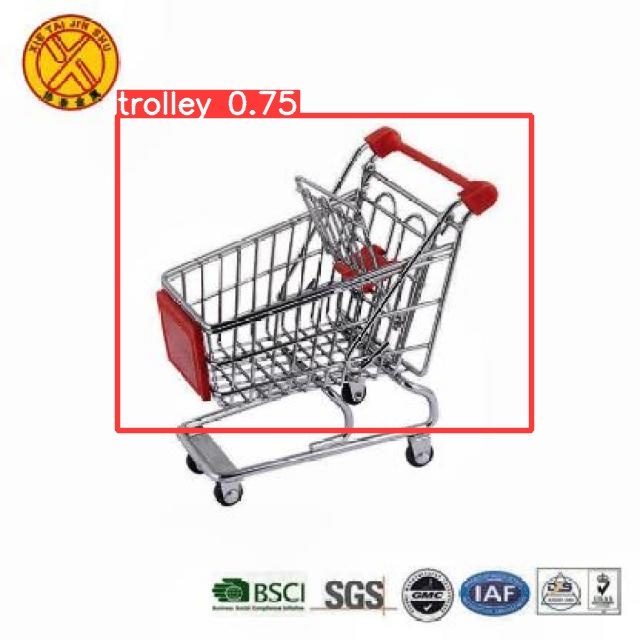

In [15]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/gdrive/MyDrive/runs/detect/predict2/*.jpg')[:1]:
  display(Image(filename=image_path,width=600))
  print("\n")

In [17]:
%cd /content/gdrive/MyDrive

!yolo task=detect mode=predict model=/content/gdrive/MyDrive/runs/detect/train2/weights/best.pt conf=0.25 source=/content/shoppingcart.mp4

/content/gdrive/MyDrive
Ultralytics YOLOv8.0.91 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (1/238) /content/shoppingcart.mp4: 128x224 (no detections), 100.8ms
video 1/1 (2/238) /content/shoppingcart.mp4: 128x224 (no detections), 10.2ms
video 1/1 (3/238) /content/shoppingcart.mp4: 128x224 (no detections), 9.4ms
video 1/1 (4/238) /content/shoppingcart.mp4: 128x224 (no detections), 9.3ms
video 1/1 (5/238) /content/shoppingcart.mp4: 128x224 (no detections), 9.5ms
video 1/1 (6/238) /content/shoppingcart.mp4: 128x224 (no detections), 9.4ms
video 1/1 (7/238) /content/shoppingcart.mp4: 128x224 1 trolley, 9.4ms
video 1/1 (8/238) /content/shoppingcart.mp4: 128x224 1 trolley, 9.7ms
video 1/1 (9/238) /content/shoppingcart.mp4: 128x224 1 trolley, 9.3ms
video 1/1 (10/238) /content/shoppingcart.mp4: 128x224 1 trolley, 14.2ms
video 1/1 (11/238) /content/shoppingcart.mp4: 128x224 1 trolley, 9

In [31]:
from ultralytics import YOLO

# load model
model = YOLO('/content/gdrive/MyDrive/runs/detect/train2/weights/best.pt')
model.fuse()

# # predict
# detections = model(frame)

Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


In [24]:
pip install bytetracker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
pip install supervision==0.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
!nvidia-smi

Tue May  2 05:42:46 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [35]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118


In [38]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


In [39]:
!pip install supervision==0.2.0

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.1.0


In [41]:
import supervision as sv

# extract video frame
generator = sv.get_video_frames_generator('/content/shoppingcart.mp4')
iterator = iter(generator)
frame = next(iterator)

# detect
results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_yolov8(results)

# annotate
box_annotator = sv.BoxAnnotator(thickness=4, text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline  
sv.show_frame_in_notebook(frame, (16, 16))

AttributeError: ignored